<a href="https://colab.research.google.com/github/sanjanathammayya/dimension-reduction-workshop-/blob/main/DimensionReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

**Load essential libraries**

---

In [48]:
import pandas as pd
import numpy as np
import sys
from scipy import linalg

import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('dark_background')
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

from scipy.sparse import random
from scipy import stats

---

Mount Google Drive folder if running Google Colab

---

In [49]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/dimensionReduction'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


**Data Matrix**:

Patient data corresponding to 4 patients and 3 features:

![Patient dataset](https://bl3302files.storage.live.com/y4mlspYO-L_1kEGpBOCUilkrcj3evQtgjGXDt6v2NgJwtsJf2OZVnwRnUht7CmW_wk8VMlMyGfhDqgRubB3pLHXAOe3r-pQ5wtYUuOqR_gsZzHWCqE2IEbhBjUZob5suLplmONyMsAjr1twDPK7eGODrKyav1dP1aX3lWx1YV0hiLvuTEZ7-GujIypTMkaSV2or?width=256&height=153&cropmode=none)

**Notation**:

*   $0$th patient vector $$\mathbf{x}^{(0)} = \begin{bmatrix}76\\126\\38.0\end{bmatrix}$$
* Data matrix in terms of samples: $$\mathbf{X} = \begin{bmatrix}\mathbf{{x}^{(0)}}^\mathrm{T}\\{{x}^{(1)}}^\mathrm{T}\\{{x}^{(2)}}^\mathrm{T}\\{{x}^{(3)}}^\mathrm{T}\end{bmatrix}.$$
*   $0$th feature (HR) vector $$\mathbf{x}_0 = \begin{bmatrix}76\\74\\72\\78\end{bmatrix}$$
* Data matrix in terms of features: $$\mathbf{X} = \begin{bmatrix}\mathbf{x}_0&\mathbf{x}_1&\mathbf{x}_2\end{bmatrix}.$$



In [50]:
## Patient data as a dataframe
df_patient = pd.DataFrame({'HR' : [76, 74, 72, 78],
                           'BP' : [126, 120, 118, 136],
                           'Temp': [38, 38, 37.5, 37]})

print(df_patient)
print('----------')
X = np.array(df_patient) # the data matrix
print(X)

   HR   BP  Temp
0  76  126  38.0
1  74  120  38.0
2  72  118  37.5
3  78  136  37.0
----------
[[ 76.  126.   38. ]
 [ 74.  120.   38. ]
 [ 72.  118.   37.5]
 [ 78.  136.   37. ]]


---

**Vector operations**:

**Addition**:

![Vector addition](https://bl3302files.storage.live.com/y4mMlnDRWzIoNKWynOZFhzhFNDlReoFxf7XwSeFwNWW8f1lu5ssj_SvgMAEN9BWiQ2F-meER7rD2an2n2tfDoWffBHE8aD_WBsL0LAbHxnIpZtZu6hNJAvZ88m746S_ktA9-h-oo108AQjkXQHkYrgJ5AUCpvKB2dipeNG1VfIK_38Q8fsq6OKD43adplgy0H1k?width=200&height=80&cropmode=none)

**Subtraction**:

![Vector subtraction](https://bl3302files.storage.live.com/y4mnQkNUONVVKJJ6dCEqV9lEuP360lE0yRumSIgl9LaQH_qBqjgI9wvUd64xJ-UNIjR7wJXZyaXZ_kf1_gAB9sXjMWaMxWhSnX6zcyvVtTrCDeO1MNWzj3A1YqI5YLALK-CGCSMurNV938QLH3C2u1-BE8_addFYSeO7DmCKz5TdWGf7qtC8M9rRN26RMqpk8iu?width=200&height=80&cropmode=none)

**Scalar mutiplication**:

![Scalar-vector multiplication](https://bl3302files.storage.live.com/y4mYNwLMmuKRl3sNDSo0yyXYs0KFw1LBnQCU6nAgSawanlGNgLq7Bd93DQ0ojamRpGLx_PZvnsSG-6K-3TsdDctw5sm-QxnWUHSTJGalDR4JmUp27_Hf3ESAQukZ1Jk5G16ykO7H3AKmLSQxE4vVIAtMFbCnyxtsQEfpyb_SK5jIjVtjl7yoFcBDzsRDGzo5cZM?width=200&height=80&cropmode=none)

**Geometric representation**:

![Vector subtraction](https://1drv.ms/i/s!AjTcbXuSD3I3hst3c2-ys_ybfdgK1A?embed=1&width=256)

---

In [51]:
## Vector operations

# Difference between the 0th and 1st patient
print(X[0]-X[1])

# Scalar-vector multiplication: convert temperature to Fahrenheit
print((9/5)*X[:, 2]+32)

# Average patient
print((1/4)*(X[0]+X[1]+X[2]+X[3]))
print(np.mean(X, axis = 0))

[2. 6. 0.]
[100.4 100.4  99.5  98.6]
[ 75.    125.     37.625]
[ 75.    125.     37.625]


---

$l_2$ norm or the geometric length of a vector denoted as $\lVert\mathbf{a}\rVert$ tells us how long a vector is. In 2-dimensions, $\lVert\mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2}$ and in $n$-dimensions, $\lVert\mathbf{a}\rVert_2 = \sqrt{a_1^2+a_2^2+\cdots+a_n^2}.$

![Vector norm](https://1drv.ms/i/s!AjTcbXuSD3I3hst4L2r4EdKcLq1DVA?embed=1&width=256)
---

In [52]:
a = np.array([1, 2])
np.linalg.norm(a)

2.23606797749979


---

**Dot Product of Vectors**

A scalar resulting from an elementwise multiplication and addition: $$\mathbf{a}{\color{cyan}\cdot}\mathbf{b} = {\color{red}{a_1b_1}}+{\color{green}{a_2b_2}}+\cdots+{\color{magenta}{a_nb_n}}$$

The <font color="cyan">dot</font> ${\color{cyan}\cdot}$ represents the computation of the dot product.

---

In [53]:
a = np.array([1, 2, 3])
b = np.array([2, -1, 0])
np.dot(a, b)

0

---

**Cauchy-Schwarz inequality**

For any two vectors $\mathbf{a}$ and $\mathbf{b}$ it is always true that $$-1\leq\frac{\mathbf{a}\cdot \mathbf{b}}{\lVert \mathbf{a}\rVert_2\lVert \mathbf{b}\rVert_2}\leq 1.$$

This is used to define the angle between the vectors $\mathbf{a}$ and $\mathbf{b}$ as follows:$$\angle(\mathbf{a},\mathbf{b}) = \cos^{-1}\left(\frac{\mathbf{a}\cdot \mathbf{b}}{\lVert \mathbf{a}\rVert_2\lVert \mathbf{b}\rVert_2}\right).$$

![Angle between vectors](https://1drv.ms/i/s!AjTcbXuSD3I3hst5ofwuXeKFAdiZtw?embed=1&width=660)
---

In [54]:
a = np.array([1, 2])
b = np.array([2, 4])
c = np.array([-2, 1])
d = np.array([-1, -2])
print(np.dot(a, b))
print(np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b)))
print(np.arccos(np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))))
print('-----')
print(np.dot(a, c))
print(np.dot(a, c)/(np.linalg.norm(a)*np.linalg.norm(c)))
print(np.arccos(np.dot(a, c)/(np.linalg.norm(a)*np.linalg.norm(c))))
print('-----')
print(np.dot(a, d))
print(np.dot(a, d)/(np.linalg.norm(a)*np.linalg.norm(d)))
print(np.arccos(np.dot(a, d)/(np.linalg.norm(a)*np.linalg.norm(d))))

10
0.9999999999999998
2.1073424255447017e-08
-----
0
0.0
1.5707963267948966
-----
-5
-0.9999999999999998
3.1415926325163688


---

Mean-centering, variance, and covariance

---

In [55]:
## Simulate a patient dataset
#np.random.seed(100)
nsamples = 100
df = pd.DataFrame({'Heart Rate (BPM)' : np.round(np.random.normal(74, 4, nsamples))})
df['Blood Pressure (mm Hg)'] = 1.6*df['Heart Rate (BPM)']+np.round(np.random.normal(5, 5, nsamples))
print(df)

    Heart Rate (BPM)  Blood Pressure (mm Hg)
0               72.0                   118.2
1               72.0                   129.2
2               74.0                   121.4
3               74.0                   123.4
4               69.0                   118.4
..               ...                     ...
95              77.0                   125.2
96              73.0                   117.8
97              74.0                   123.4
98              76.0                   122.6
99              72.0                   124.2

[100 rows x 2 columns]


In [56]:
#a_mc
df['HR Mean-Centered'] = a_mc
df['BP Mean-Centered'] = b_mc
df.head(5)

,Heart Rate (BPM),Blood Pressure (mm Hg),HR Mean-Centered,BP Mean-Centered
0,72.0,118.2,6.05,11.09
1,72.0,129.2,-0.95,-1.11
2,74.0,121.4,-5.95,-8.11
3,74.0,123.4,-0.95,-2.11
4,69.0,118.4,2.05,9.69


In [57]:
np.dot(a_mc, b_mc) # Covariance between HR and BP
np.dot(a_mc, a_mc) # Covariance between HR and HR (variance of HR)

1546.7499999999998

1969.184
0.7898046010986876
---------------------
12.420399999999999
3.5242587873196825
---------------------


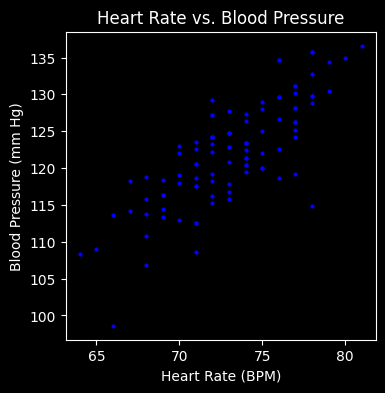

In [58]:
# Vector of heart rate and blood pressure
a = df['Heart Rate (BPM)']
b = df['Blood Pressure (mm Hg)']

# Mean-centered heart rate and blood pressure vectors
a_mc = a - np.mean(a)
b_mc = b - np.mean(b)
# Covariance between a and b
print(np.dot(a_mc, b_mc))
# Correlation coefficient
print(np.dot(a_mc, b_mc) / (np.linalg.norm(a_mc) * np.linalg.norm(b_mc)))
print('---------------------')

# Variance of the heart rates (BPM^2)
print(np.mean((a-np.mean(a))**2))
# Standard deviation of the heart rates (BPM)
print(np.sqrt(np.mean((a-np.mean(a))**2)))
print('---------------------')

# Scatter plot between heart rate and blood pressure vectors
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.scatter(a, b, marker = 'o', color = 'blue', s = 4.0)
#ax.scatter(a_mc, b_mc, marker = 'o', color = 'red', s = 4.0)
ax.set_xlabel('Heart Rate (BPM)')
ax.set_ylabel('Blood Pressure (mm Hg)')
ax.set_title('Heart Rate vs. Blood Pressure');

---

**Projection of vectors and its relationship to dot product**

The projection of a sample vector $\mathbf{x}^{(i)}$ along the direction specified by a vector $\mathbf{v}$ is intuitively a measure of how much of sample $\mathbf{x}^{(i)}$ is contained along the direction given by $v\mathbf{v}.$

![Vector projection](https://onedrive.live.com/embed?resid=37720F927B6DDC34%21100196&authkey=%21AIQr3fMEJZChQNI&width=256)

We can derive an expression for the projection $\text{proj}_\mathbf{v}\left(\mathbf{x}^{(i)} \right )$ as follows:

$\begin{align*}
\begin{cases}\text{proj}_\mathbf{v}\left(\mathbf{x}^{(i)} \right )
 &= c\mathbf{v}, \text{for some unknown constant }c \text{ (why?)}\\\mathbf{y}&=\mathbf{x}^{(i)}-\text{proj}_\mathbf{v}\left(\mathbf{x}^{(i)} \right)\text{ (why?)}\\\mathbf{y}\cdot \mathbf{v} &= 0\text{ (why?)}\end{cases}
\end{align*}$
$\begin{align*}\Rightarrow\left(\mathbf{x}^{(i)}-\text{proj}_\mathbf{v}\left(\mathbf{x}^{(i)} \right)\right)\cdot \mathbf{v} &= 0\\\Rightarrow \left(\mathbf{x}^{(i)}-c\mathbf{v} \right )\cdot \mathbf{v} &=0\\\Rightarrow \mathbf{x}^{(i)}\cdot \mathbf{v}-c(\mathbf{v}\cdot \mathbf{v})&=0\\\Rightarrow c &=\dfrac{\mathbf{x}^{(i)}\cdot \mathbf{v}}{\mathbf{v}\cdot \mathbf{v}}\\\Rightarrow \text{proj}_\mathbf{v}\left(\mathbf{x}^{(i)} \right ) &= c\mathbf{v} = \left(\dfrac{\mathbf{x}^{(i)}\cdot \mathbf{v}}{\mathbf{v}\cdot \mathbf{v}}\right)\mathbf{v} = \left(\dfrac{\mathbf{x}^{(i)}\cdot v}{\lVert \mathbf{v}\rVert^2}\right)\mathbf{v} \\&= \underbrace{\left(\dfrac{\mathbf{x}^{(i)}\cdot \mathbf{v}}{\lVert \mathbf{v}\rVert}\right)}_{\text{shadow length}}\,\underbrace{\dfrac{\mathbf{v}}{\lVert \mathbf{v}\rVert}}_{\text{direction}}. \end{align*}$

---

In [59]:
## Scalar projection of 0th patient onto a direction v
print(X[0])
v = np.array([1, 0, 0])
print(np.dot(X[0], v) / np.linalg.norm(v))
v = np.array([0, 1, 0])
print(np.dot(X[0], v) / np.linalg.norm(v))
v = np.array([1, 1, 1])
print(np.dot(X[0], v) / np.linalg.norm(v))
v = np.array([-1, -1, -1])
print(np.dot(X[0], v) / np.linalg.norm(v))

[ 76. 126.  38.]
76.0
126.0
138.5640646055102
-138.5640646055102


---

A matrix-vector product is simply a sequence of dot products of the rows of matrix (seen as vectors) with the vector:

![Matrix-vector product](https://1drv.ms/i/s!AjTcbXuSD3I3hst6C_XOhdee1oi59A?embed=1&width=660)

This can be used to calculate the projection of all patients in matrix $\mathbf{X}$ onto a direction $\mathbf{v}.$

---

In [60]:
## Scalar projection of all patients onto a direction v
v = np.array([1, 0, 0])
print((1/np.linalg.norm(v)) * np.dot(X, v))
v = np.array([0, 1, 0])
print((1/np.linalg.norm(v)) * np.dot(X, v))
v = np.array([1, 1, 1])
print((1/np.linalg.norm(v)) * np.dot(X, v))
v = np.array([-1, -1, -1])
print((1/np.linalg.norm(v)) * np.dot(X, v))

[76. 74. 72. 78.]
[126. 120. 118. 136.]
[138.56406461 133.94526245 131.34718624 144.91491757]
[-138.56406461 -133.94526245 -131.34718624 -144.91491757]


---

Load food-texture data

---

In [61]:
## Load data
FILE = DATA_DIR + 'food-texture.csv'
df_food = pd.read_csv(FILE, index_col = 0)
df_food.head()

,Oil,Density,Crispy,Fracture,Hardness
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143


---

Add a new column called "Crispylevel" to dataframe based on low (<= 11) or high (> 11) Crispy values

---

In [62]:
df_food['Crispylevel'] = df_food['Crispy'].apply(lambda x: 'low' if x <= 10 else 'high')
df_food.head(5)

,Oil,Density,Crispy,Fracture,Hardness,Crispylevel
B110,16.5,2955,10,23,97,low
B136,17.7,2660,14,9,139,high
B171,16.2,2870,12,17,143,high
B192,16.7,2920,10,31,95,low
B225,16.3,2975,11,26,143,high


In [63]:
df_food.dtypes

,0
Oil,float64
Density,int64
Crispy,int64
Fracture,int64
Hardness,int64
Crispylevel,object


In [64]:
## Create a list of continuous and categorical column names
continuous_cols = ['Oil', 'Density', 'Fracture', 'Hardness']
categorical_cols = ['Crispy', 'Crispylevel']

# Typecasting columns to correct types
df_food[categorical_cols] = df_food[categorical_cols].astype('category')
df_food[continuous_cols] = df_food[continuous_cols].astype('float64')

## Print dataframe column types
df_food.dtypes

,0
Oil,float64
Density,float64
Crispy,category
Fracture,float64
Hardness,float64
Crispylevel,category


---

Principal component analysis (PCA) of the dataset. Here we reduce the dimensionality to one.

---

In [65]:
df_food[continuous_cols]

,Oil,Density,Fracture,Hardness
B110,16.5,2955.0,23.0,97.0
B136,17.7,2660.0,9.0,139.0
B171,16.2,2870.0,17.0,143.0
B192,16.7,2920.0,31.0,95.0
B225,16.3,2975.0,26.0,143.0
B237,19.1,2790.0,16.0,189.0
B261,18.4,2750.0,17.0,114.0
B264,17.5,2770.0,26.0,63.0
B353,15.7,2955.0,23.0,123.0
B360,16.4,2945.0,24.0,132.0


In [66]:
pca = PCA(n_components = 1)
np.sum(np.var(pca.fit_transform(X), axis = 0))/np.sum(np.var(X, axis = 0))

0.9911907451840251

In [67]:
# numpy array of data corresponding to continuous columns
X = np.array(df_food[continuous_cols])

# Create and fit PCA object
pca = PCA(n_components = 1)
pca.fit(X)

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-0.00958687  0.99923202  0.0249962   0.02861215]]
[15523.38854181]


---

Project all samples on to the direction of the first principal component vector

---

In [68]:
# Get the first principal component vector
v = pca.components_.flatten()
print(v)
print('--------------')

# Print the norm of the first principal component vector
print(np.linalg.norm(v))
print('--------------')

# Project all samples on to the direction of the first principal component vector
X_projected = np.dot(X, v) / np.linalg.norm(v)
# Variance of the projected samples
print(np.var(X_projected))

[-0.00958687  0.99923202  0.0249962   0.02861215]
--------------
0.9999999999999996
--------------
15212.920770976967


---

Plot the projections of the data on to the directions of several vectors and observe how the projected data is distributed in comparison to the projection on to the first principal direction.

---

[[-0.00958687  1.          1.          1.        ]
 [ 0.99923202  1.         -1.          0.        ]
 [ 0.0249962   1.          1.          1.        ]
 [ 0.02861215  1.         -1.          1.        ]]
--------------
[15212.92077098  4330.057909    4161.098269     279.45667867]
--------------


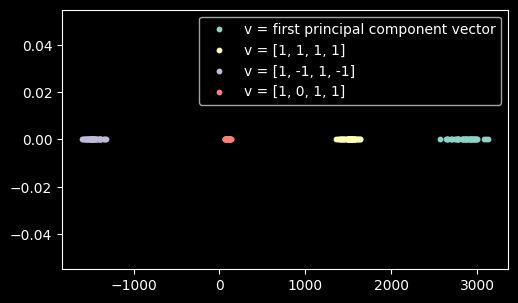

In [69]:
# The vectors along which the data is projected form the columns of a matrix
V = np.vstack((v, np.array([1, 1, 1, 1]),  np.array([1, -1, 1, -1]), np.array([1, 0, 1, 1]))).T
print(V)
print('--------------')

# The projected versions of the samples are the columns of the matrix-matrix product XV
X_projected = np.dot(X, V) / np.linalg.norm(V, axis = 0)

# The variance of the projected samples on to each direction
# Note which direction results in the largest variance
print(np.var(X_projected, axis = 0))
print('--------------')

# Plot the projected versions of the samples
# Note which projection shows the largest variance in data
fig, ax = plt.subplots(1, 1, figsize = (6, 4))
fig.tight_layout(pad = 4.0)
ax.scatter(X_projected[:, 0], np.zeros(len(X_projected[:, 0])), s = 10, label = 'v = first principal component vector')
ax.scatter(X_projected[:, 1], np.zeros(len(X_projected[:, 1])), s = 10, label = 'v = [1, 1, 1, 1]')
ax.scatter(X_projected[:, 2], np.zeros(len(X_projected[:, 2])), s = 10, label = 'v = [1, -1, 1, -1]')
ax.scatter(X_projected[:, 3], np.zeros(len(X_projected[:, 3])), s = 10, label = 'v = [1, 0, 1, 1]')
ax.legend(loc='upper right');

---

Standardize data and repeat PCA with one component

---

In [70]:
# numpy array of data corresponding to continuous columns
sc = StandardScaler()
X = sc.fit_transform(np.array(df_food[continuous_cols]))

# Create and fit PCA object
pca = PCA(n_components = 4)
pca.fit(X)

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-0.58633268  0.59639892  0.54419604 -0.06612857]
 [-0.22401109  0.21977465 -0.37628261  0.87173937]
 [ 0.59225884  0.01510427  0.67499995  0.43974583]
 [ 0.50523509  0.77186741 -0.32655341 -0.20572088]]
[2.29331669 1.2378076  0.30740296 0.2431054 ]


In [71]:
np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)

array([0.56186259, 0.86512545, 0.94043918, 1.        ])

---

PCA with two components

---

In [72]:
# Create and fit PCA object
pca = PCA(n_components = 2)
pca.fit(X)

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-0.58633268  0.59639892  0.54419604 -0.06612857]
 [-0.22401109  0.21977465 -0.37628261  0.87173937]]
[2.29331669 1.2378076 ]


---

PCA with four components

---

In [73]:
# Create and fit PCA object
pca = PCA(n_components = 4)
pca.fit(X)

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[-0.58633268  0.59639892  0.54419604 -0.06612857]
 [-0.22401109  0.21977465 -0.37628261  0.87173937]
 [ 0.59225884  0.01510427  0.67499995  0.43974583]
 [ 0.50523509  0.77186741 -0.32655341 -0.20572088]]
[2.29331669 1.2378076  0.30740296 0.2431054 ]


---

Fit a PCA model for the dataset considering only two features: (1) Density (2) Hardness

In [74]:
# Create and fit PCA object
pca = PCA(n_components = 2)
pca.fit(X[:, -2:])

# Print principal components
print(pca.components_)

# Print explained variance
print(pca.explained_variance_)

[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[1.40138616 0.63943017]


Text(0, 0, '')

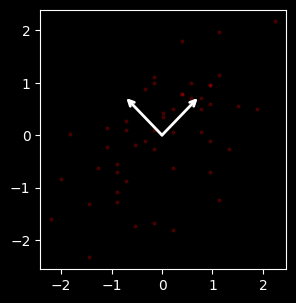

In [75]:
## Scatter plot of density and hardness along with the component vectors
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
fig.tight_layout(pad = 4.0)
ax.scatter(X[:, -2], X[:, 1], s = 4.0, alpha = 0.2, color = 'red')
arrowprops = dict(arrowstyle = '->', linewidth = 2, shrinkA = 0, shrinkB = 0)
ax.annotate('', xy = (pca.components_[0, 0], pca.components_[1, 0]), xytext = (0, 0), arrowprops = arrowprops)
ax.annotate('', xy = (pca.components_[0, 1], pca.components_[1, 1]), xytext = (0, 0), arrowprops = arrowprops)

In [76]:
pca.components_[1, 0]

0.7071067811865472